In [32]:
#Importar librerias
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

<h1> Data cleaning</h1>

Importar el csv con consumo de energia (MW) y Temperatura (C°) con el fin de:
* Visualizar datos.
* Identificar outliers y removerlos.
* Tratar los valores nulos.
* Comprobar si fueron resueltos los problemas.

In [92]:
# Importar csv que posee Consumo de energia y Temperatura de 23 provincias + CABA.
df = pd.read_csv("BASE.csv", header = 0, parse_dates = [0], index_col = 0, dayfirst=True) 
df = df.iloc[:,:6] # Seleccionar la información para la Provincia de Buenos Aires y GBA.
df['Año'] = pd.DatetimeIndex(df.index).year
df['Mes'] = pd.DatetimeIndex(df.index).month
df

,Hora,Tipo Dia,Energia BSAS,Clima BSAS,Energia GBA,Clima GBA,Año,Mes
Fecha,,,,,,,,
2018-01-01 00:00:00,0,1,1544.873,19.2,4593.287,19.2,2018,1
2018-01-01 01:00:00,1,1,1425.868,18.6,4384.859,18.6,2018,1
2018-01-01 02:00:00,2,1,1387.791,18.5,4266.546,18.5,2018,1
2018-01-01 03:00:00,3,1,1327.708,17.9,4103.462,17.9,2018,1
2018-01-01 04:00:00,4,1,1268.554,17.5,3912.347,17.5,2018,1
...,...,...,...,...,...,...,...,...
2021-07-31 19:00:00,19,7,1993.628,11.6,6638.925,11.6,2021,7
2021-07-31 20:00:00,20,7,2179.763,9.9,7349.056,9.9,2021,7
2021-07-31 21:00:00,21,7,2185.000,9.0,7698.634,9.0,2021,7


In [93]:
#Estadisticas descriptivas
df.describe()

,Hora,Tipo Dia,Energia BSAS,Clima BSAS,Energia GBA,Clima GBA,Año,Mes
count,31392.000000,31392.000000,31392.000000,31291.000000,31392.000000,31291.000000,31392.000000,31392.000000
mean,11.500000,3.902905,1711.380114,18.515474,5635.553572,18.515474,2019.324924,6.116208
std,6.922297,2.068559,239.908452,6.414347,1264.013942,6.414347,1.049593,3.386745
min,0.000000,1.000000,35.574000,0.000000,1.538000,0.000000,2018.000000,1.000000
25%,5.750000,2.000000,1542.132500,13.700000,4694.610000,13.700000,2018.000000,3.000000
50%,11.500000,4.000000,1702.990000,18.600000,5506.274000,18.600000,2019.000000,6.000000
75%,17.250000,6.000000,1868.775000,23.200000,6401.638250,23.200000,2020.000000,9.000000
max,23.000000,7.000000,2591.461000,37.800000,10478.560000,37.800000,2021.000000,12.000000


In [94]:
# Hay NaN?
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31392 entries, 2018-01-01 00:00:00 to 2021-07-31 23:00:00
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Hora          31392 non-null  int64  
 1   Tipo Dia      31392 non-null  int64  
 2   Energia BSAS  31392 non-null  float64
 3   Clima BSAS    31291 non-null  float64
 4   Energia GBA   31392 non-null  float64
 5   Clima GBA     31291 non-null  float64
 6   Año           31392 non-null  int64  
 7   Mes           31392 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 2.2 MB


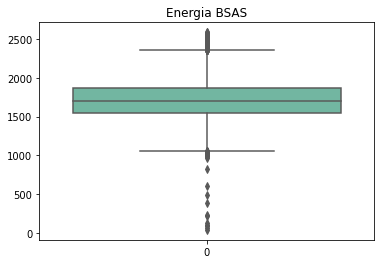

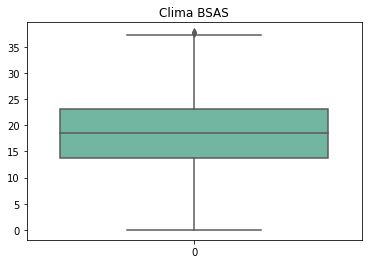

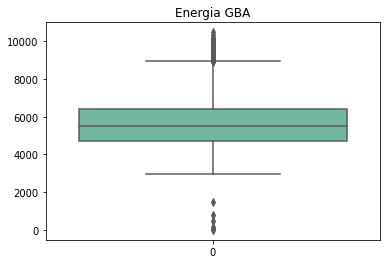

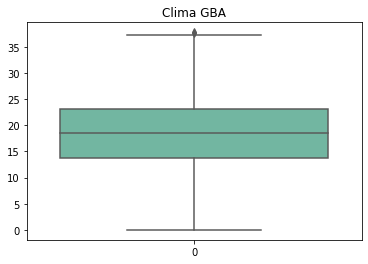

In [103]:
#Graficos de boxplot para evaluar la existencia de outliers
for column in df.columns[2:6]:
    plt.figure()
    sns.boxplot(data=df[column], palette="Set2").set_title(column)

array([[<AxesSubplot:title={'center':'Energia BSAS'}>,
        <AxesSubplot:title={'center':'Clima BSAS'}>],
       [<AxesSubplot:title={'center':'Energia GBA'}>,
        <AxesSubplot:title={'center':'Clima GBA'}>]], dtype=object)

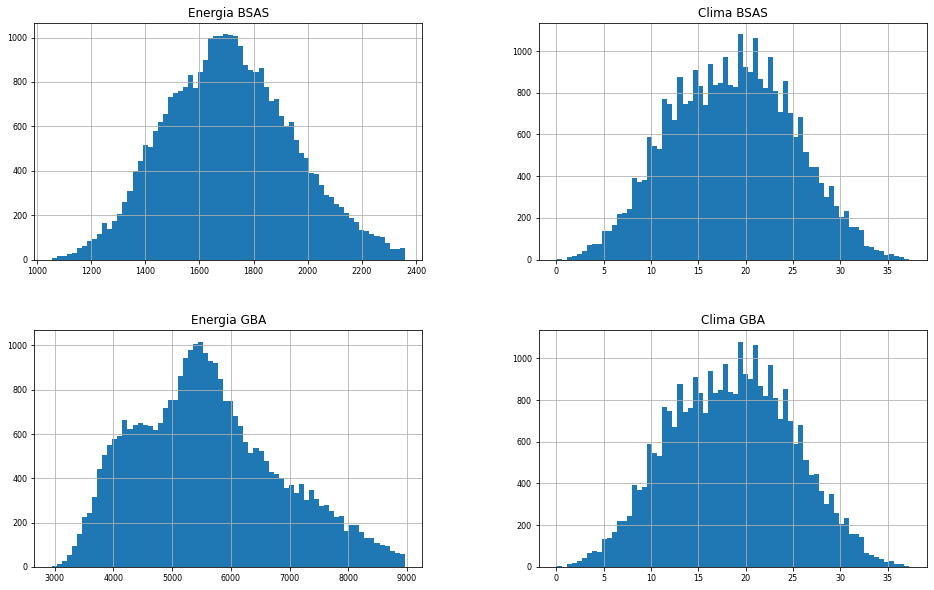

In [113]:
#Histogramas
df.iloc[:,2:6].hist(figsize=(16, 10), bins=70, xlabelsize=8, ylabelsize=8)

Hace falta corregir la existencia de outliers para los datos de energia y valores nulos para el caso de la temperatura.\
Para el tratamiento de outliers consideramos dos opciones: z-score e IQR.\
Al no ser distribuciones perfectamente normales en todos los casos, utilizamos el IQR.


In [114]:
#Calculo del rango intercuartil
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Hora              11.5000
Tipo Dia           4.0000
Energia BSAS     325.7175
Clima BSAS         9.5000
Energia GBA     1697.4945
Clima GBA          9.5000
Año                2.0000
Mes                6.0000
dtype: float64


In [115]:
#Reemplazar outliers con NaN utilizando el IQR

df = df.mask((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)), np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31392 entries, 2018-01-01 00:00:00 to 2021-07-31 23:00:00
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Hora          31392 non-null  int64  
 1   Tipo Dia      31392 non-null  int64  
 2   Energia BSAS  31383 non-null  float64
 3   Clima BSAS    31392 non-null  float64
 4   Energia GBA   31375 non-null  float64
 5   Clima GBA     31392 non-null  float64
 6   Año           31392 non-null  int64  
 7   Mes           31392 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 2.2 MB


In [119]:
# Completa los valores NaN con la media de los valores que poseen el mismo año, mes, dia de la semana y hora.
for fecha in df[df.isna().any(axis=1)].index:
    df[df.index == fecha] = df[df.index == fecha].fillna\
                                                   (df[(pd.DatetimeIndex(df.index).year == fecha.year) &\
                                                    (pd.DatetimeIndex(df.index).month == fecha.month) & \
                                                    (pd.DatetimeIndex(df.index).weekday == fecha.dayofweek) &\
                                                    (pd.DatetimeIndex(df.index).hour == fecha.hour) \
                                                                                       ].mean())

Repetimos el proceso de visualización para identificar si fueron resueltos los problemas en las series de tiempo

In [120]:
#Comprobar que fueron reemplazados los NaN
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31392 entries, 2018-01-01 00:00:00 to 2021-07-31 23:00:00
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Hora          31392 non-null  int64  
 1   Tipo Dia      31392 non-null  int64  
 2   Energia BSAS  31388 non-null  float64
 3   Clima BSAS    31392 non-null  float64
 4   Energia GBA   31392 non-null  float64
 5   Clima GBA     31392 non-null  float64
 6   Año           31392 non-null  int64  
 7   Mes           31392 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 2.2 MB


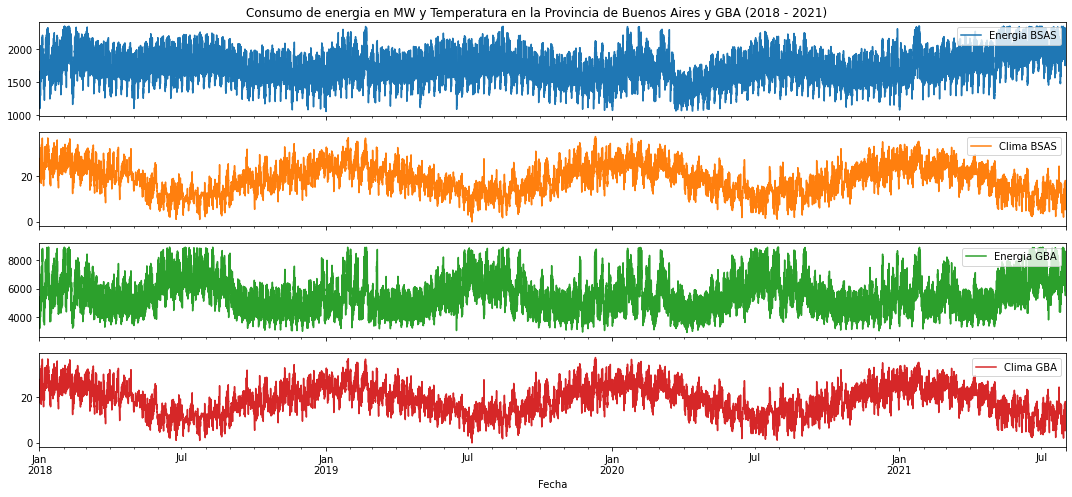

In [128]:
df[['Energia BSAS', 'Clima BSAS', 'Energia GBA', 'Clima GBA']].plot(subplots = True, figsize = (15,7))
[ax.legend(loc = 1) for ax in plt.gcf().axes]
plt.suptitle('Consumo de energia en MW y Temperatura en la Provincia de Buenos Aires y GBA (2018 - 2021)')
plt.tight_layout()
plt.subplots_adjust(top = 0.95)

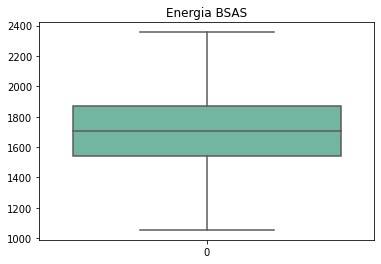

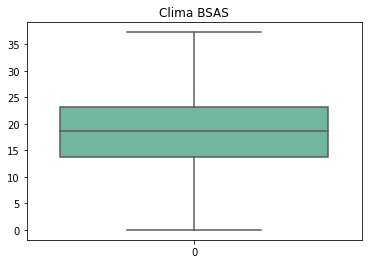

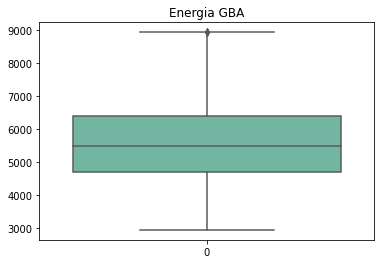

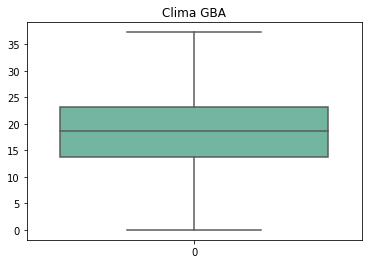

In [125]:
#Graficos de boxplot
for column in df.columns[2:6]:
    plt.figure()
    sns.boxplot(data=df[column], palette="Set2").set_title(column)

array([[<AxesSubplot:title={'center':'Energia BSAS'}>,
        <AxesSubplot:title={'center':'Clima BSAS'}>],
       [<AxesSubplot:title={'center':'Energia GBA'}>,
        <AxesSubplot:title={'center':'Clima GBA'}>]], dtype=object)

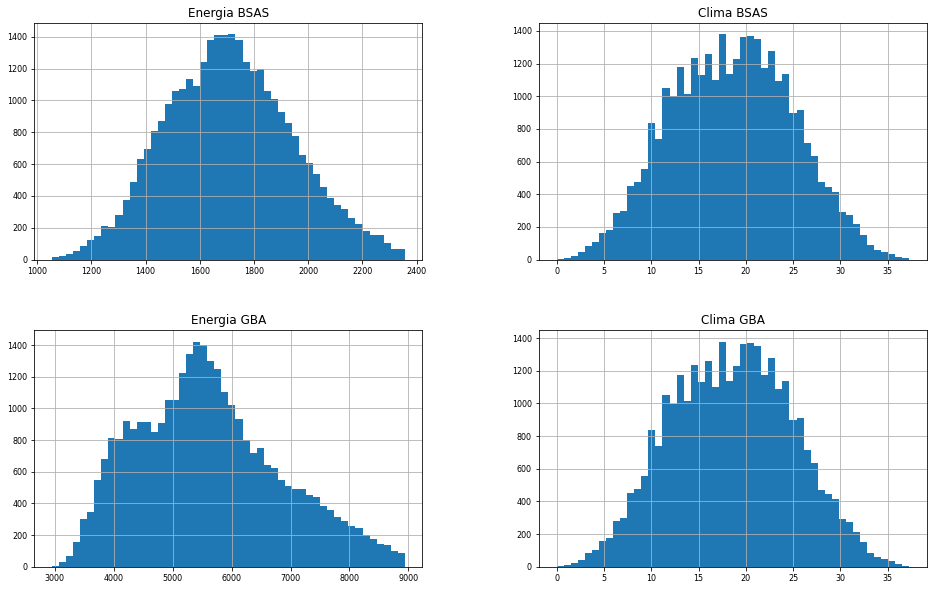

In [122]:
#Distribuciones
df.iloc[:,2:6].hist(figsize=(16, 10), bins=50, xlabelsize=8, ylabelsize=8)

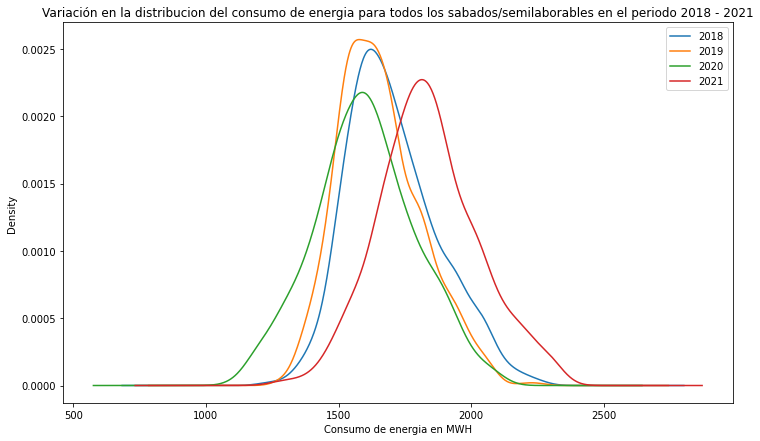

In [87]:
df1 = df.loc[df['Tipo Dia'] == 7]
for año in df1['Año'].unique():
    df1[df1['Año'] == año]['Energia BSAS'].plot(kind='density', figsize = (12,7), legend = True, label = año)
    _ = plt.xlabel('Consumo de energia en MWH')
    _ = plt.title('Variación en la distribucion del consumo de energia para todos los sabados/semilaborables en el periodo 2018 - 2021')

In [88]:
#Exportar csv sin outliers
df.to_csv("BASEo.csv")